#Preventing Financial Loss through Automobile Insurace Fraud Classification

In [5]:
#Importing the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import imblearn
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [6]:
#Creating a Dataframe for our Dataset
df = pd.read_csv('/content/Insurance_claims (4).csv')

Data Exploration

In [7]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
#Replacing the '?' with 'NaN' values.
df.replace('?', np.nan, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
#Finding the number of nulls
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [13]:
#Replacing the nulls with their respective mode values
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [14]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [15]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [16]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

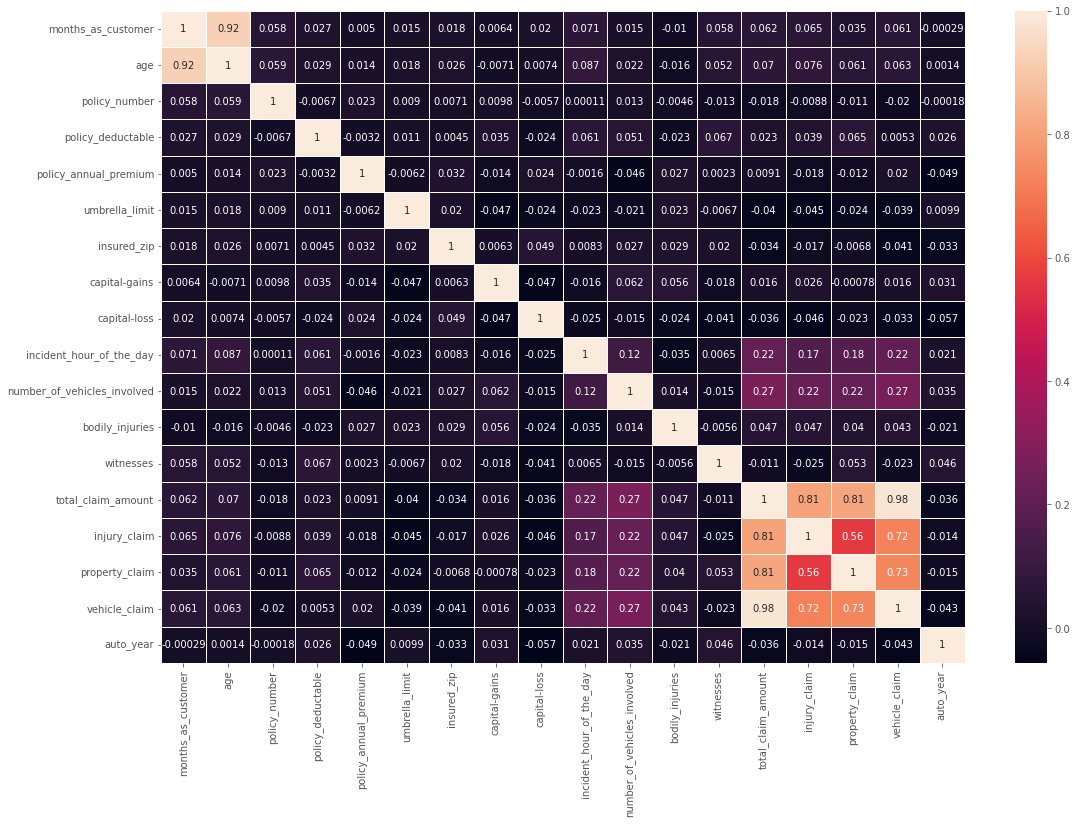

In [17]:
#Correlation plot
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [18]:
print([df.nunique()>50])


[months_as_customer              True
age                            False
policy_number                   True
policy_bind_date                True
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium           True
umbrella_limit                 False
insured_zip                     True
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                   True
capital-loss                    True
incident_date                   True
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location               True
incident_hour_of_the_day       False
number_of_vehicles_involved    False


#Univariate Analysis

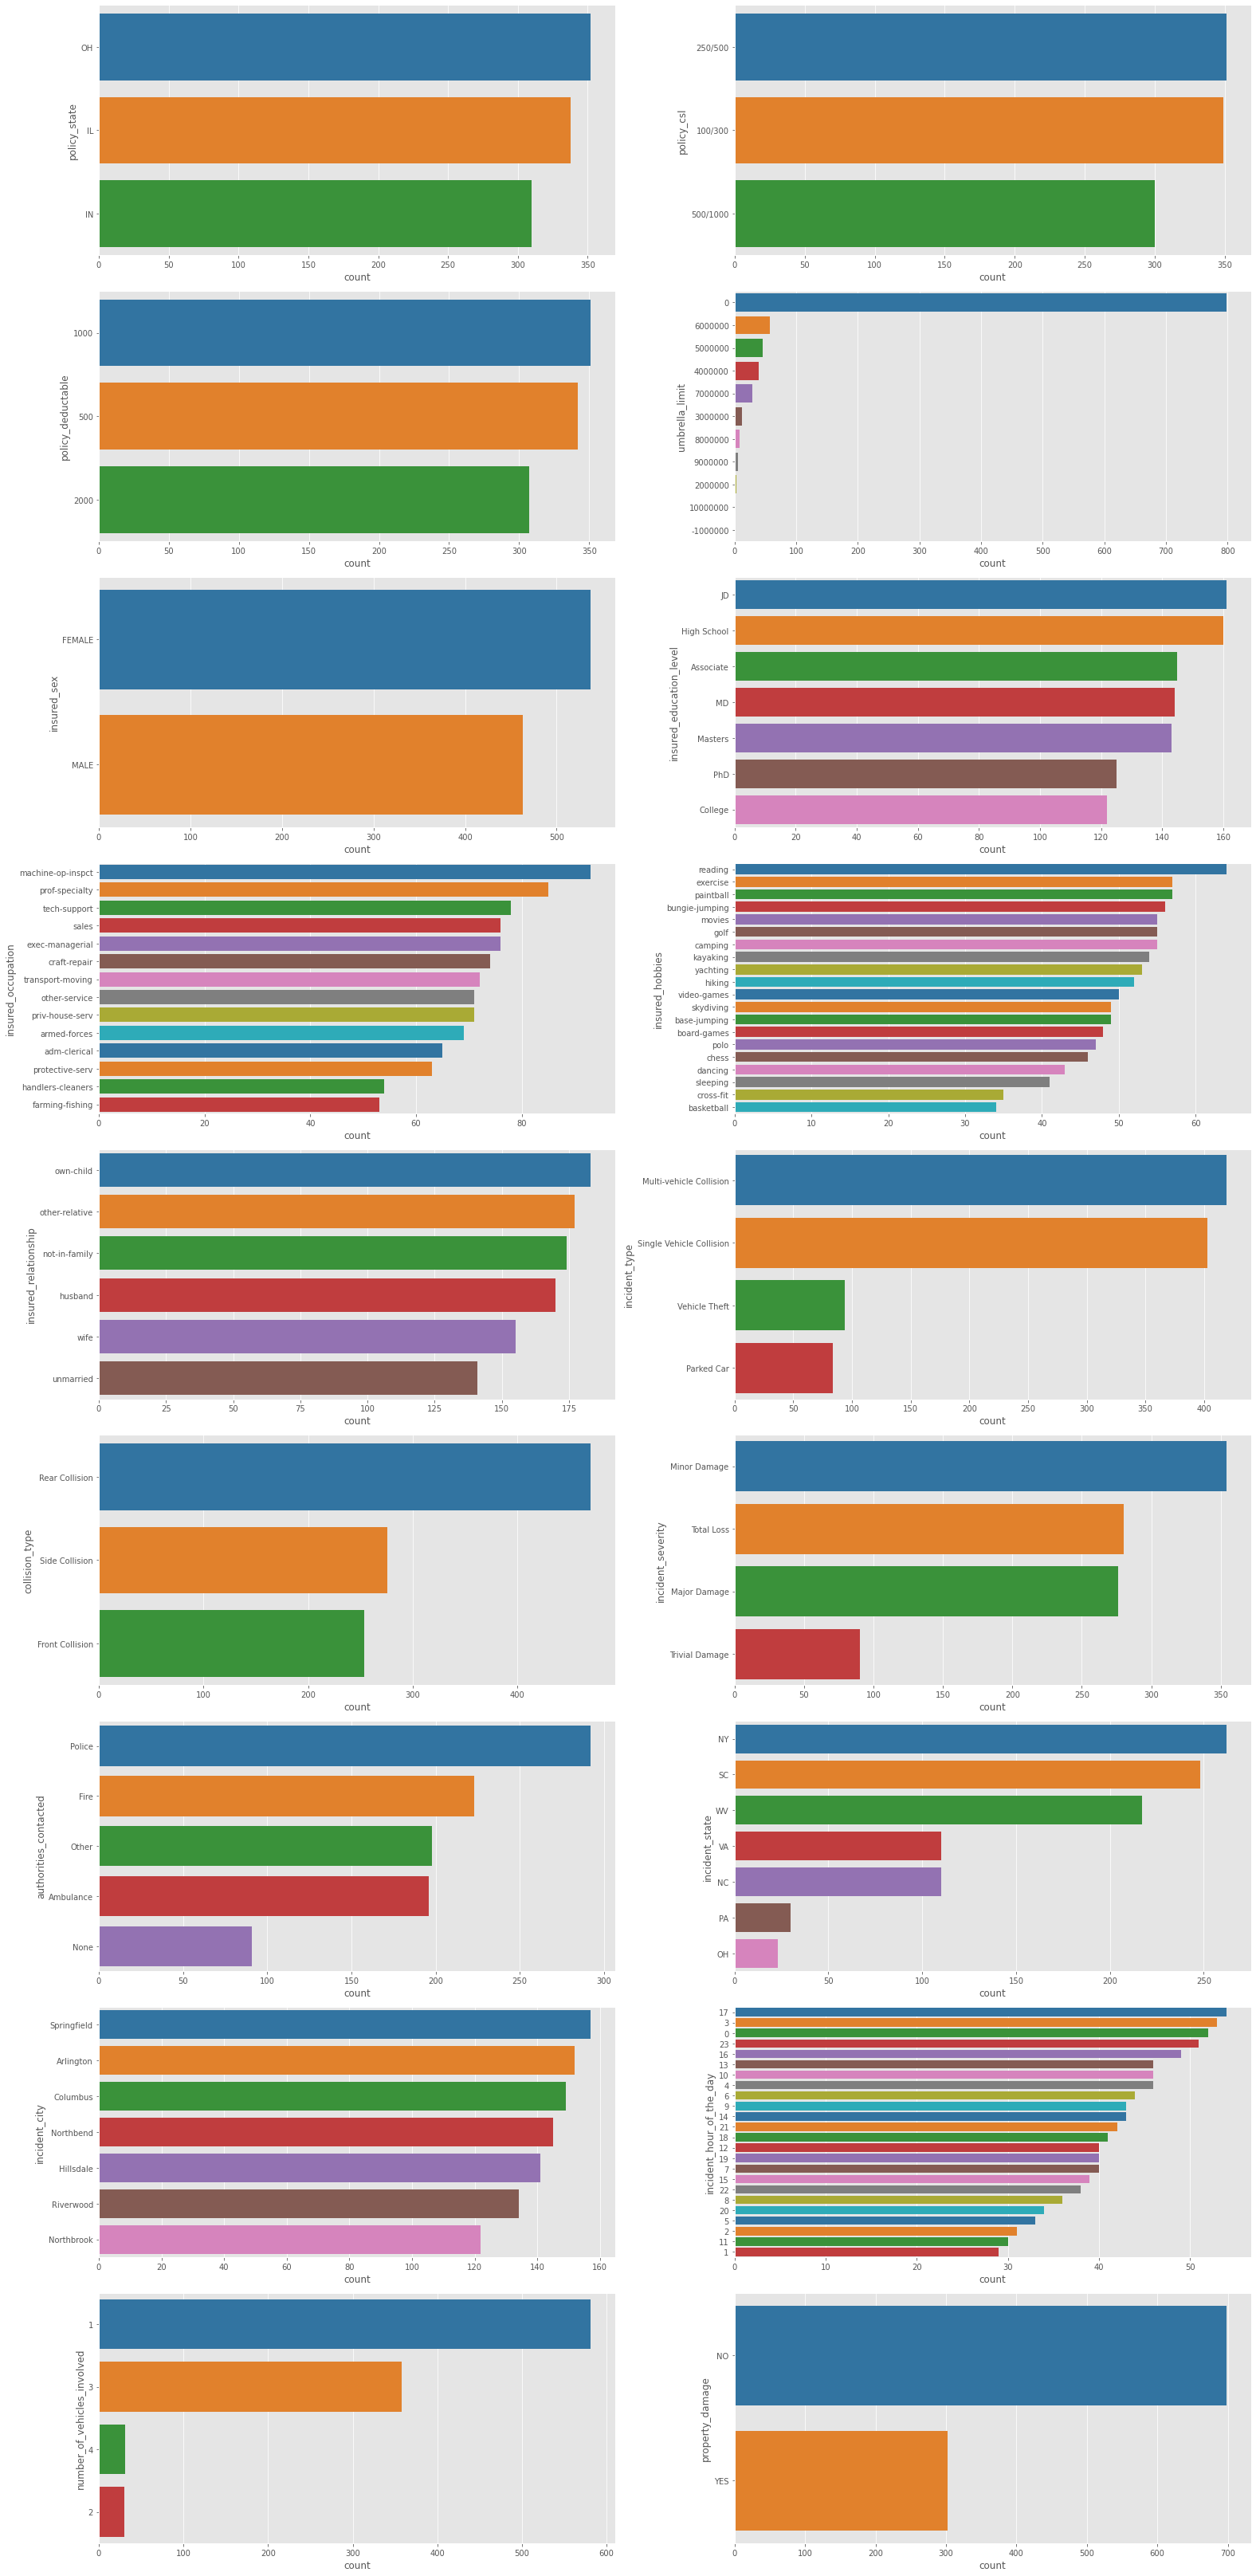

In [19]:
fig, axes = plt.subplots(9, 2, figsize=(22,45))
axes = axes.flatten()

for ax, col in zip(axes, [ 
       'policy_state', 'policy_csl', 'policy_deductable',
        'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']):
    sns.countplot(y=col, data=df, ax=ax, 
                  palette="tab10", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

In [20]:
#Dropping the following variables.
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

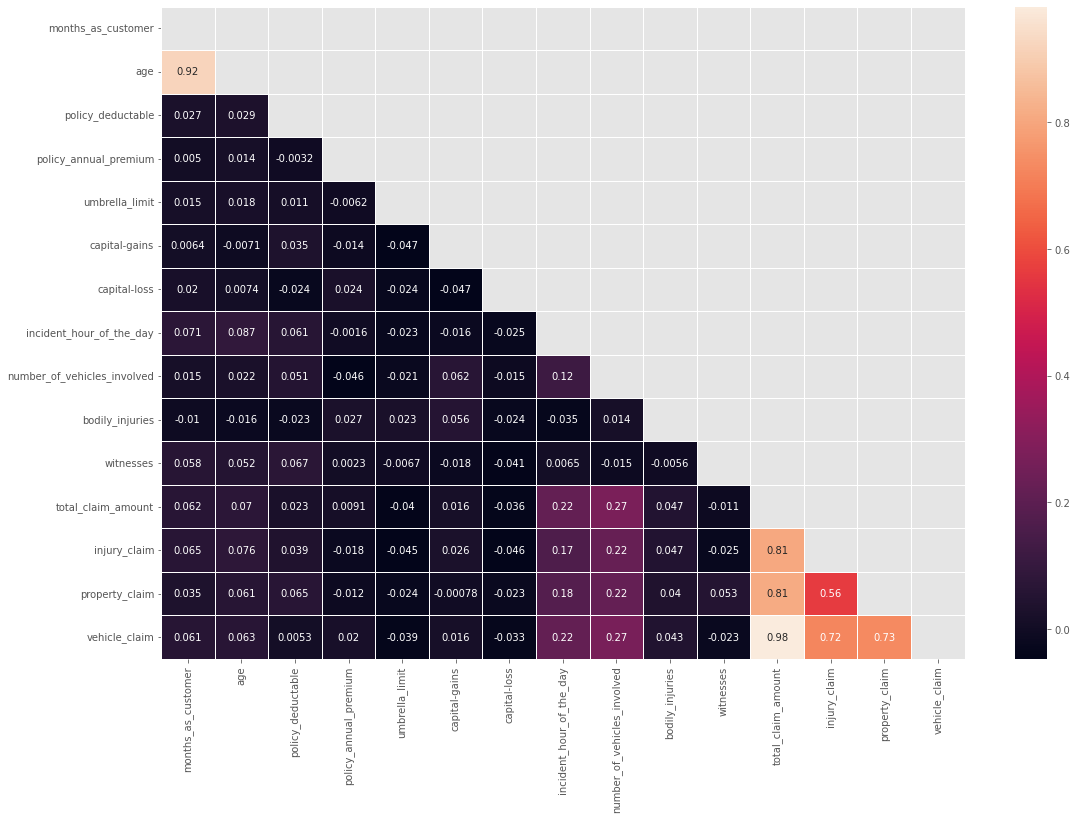

In [21]:
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [22]:
#From this plot we can see that months_as_customers and age are highly correlated, so we can drop the ‘Age’ column. 

#Similarly, even total_clam_amount, injury_claim, property_claim, vehicle_claim are highly correlated and total claim is the sum of the other claims. Hence we can drop that column too.

df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

Data Mining Tasks

In [24]:
#Selecting fraud_reported as our target variable.
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [25]:
X

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,Police,5,1,YES,1,2,YES,6510,13020,52080
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,Police,8,1,NO,0,0,NO,780,780,3510
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,Police,7,3,NO,2,3,NO,7700,3850,23100
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,Police,5,1,NO,1,2,NO,6340,6340,50720
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,None,20,1,NO,0,1,NO,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,Fire,20,1,YES,0,1,NO,17440,8720,61040
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,Fire,23,1,YES,2,3,NO,18080,18080,72320
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,Police,4,3,NO,2,3,YES,7500,7500,52500
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,Other,2,1,NO,0,1,YES,5220,5220,36540


In [26]:
# Checking for the target variable distribution
fig = px.pie(data_frame = df, names = 'fraud_reported', hole = 0.5, title = 'Yes vs No', 
             width = 640, height = 480, color_discrete_sequence = px.colors.sequential.Bluered)
fig.update_layout(title_x = 0.5, uniformtext_minsize = 30)
fig.show()

In [27]:
# Oversampling

a1=X
b1=y

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="minority") # oversampling

X_res, y_res = ros.fit_resample(a1, b1)

X_res.shape[0] - a1.shape[0]

506

In [28]:
cat_df = X_res.select_dtypes(include = ['object'])

In [29]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [30]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [31]:
#Replacing categorical values with dummies.
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [32]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [33]:
num_df = X_res.select_dtypes(include = ['int64'])

In [34]:
num_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...
1501,102,500,3000000,0,0,11,1,1,0,9480,4740,33180
1502,355,2000,4000000,0,0,19,3,2,1,6280,6280,50240
1503,258,500,0,0,-44400,0,3,2,3,6770,20310,54160
1504,82,1000,0,13100,-38200,14,1,2,3,8960,8960,53760


In [35]:
#Standardizing our data and scaling it.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_res.index)
scaled_num_df.head()

X_res.drop(columns = scaled_num_df.columns, inplace = True)

X_res = pd.concat([scaled_num_df, cat_df], axis = 1)

In [36]:
#Splitting our data into 80% for training and 20% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, 
    y_res, 
    test_size=0.20,
    random_state=42)

print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (1204, 53)
Input Test: (302, 53)
Output Training: (1204,)
Output Test: (302,)


In [37]:
X_train

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
598,0.698426,-0.203871,2.109549,1.723308,-1.588694,0.643749,1.102459,0.016219,1.371245,-0.347804,...,0,0,0,0,0,0,0,0,0,1
907,1.901636,1.424936,-0.482494,0.690046,-0.455531,0.786868,1.102459,0.016219,0.456677,1.765372,...,0,1,0,0,1,0,0,0,0,0
602,-1.638743,-0.203871,-0.482494,1.286719,-0.175872,-1.646150,-0.840553,1.237481,-0.457891,0.476189,...,0,0,1,0,0,0,1,0,0,0
924,-0.608657,1.424936,-0.482494,0.479028,-0.724294,0.929987,1.102459,-1.205044,-0.457891,-0.370750,...,0,1,0,0,0,0,0,0,0,0
1117,0.317554,1.424936,2.109549,-0.870760,-1.272716,0.500630,1.102459,0.016219,0.456677,-0.214296,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-1.032810,-1.018275,2.541556,-0.870760,-0.135920,-0.071844,-0.840553,0.016219,-0.457891,1.494185,...,0,1,0,0,0,0,0,1,0,1
1294,0.438741,-0.203871,-0.482494,-0.870760,0.964556,1.073105,1.102459,-1.205044,0.456677,-0.272706,...,0,0,0,0,1,0,0,0,0,0
860,0.213680,-0.203871,-0.482494,-0.870760,-0.680711,0.214393,1.102459,0.016219,0.456677,0.622213,...,0,1,0,0,0,0,1,0,0,1
1459,0.594552,1.424936,-0.482494,0.610005,-0.753349,1.502462,-0.840553,-1.205044,1.371245,0.609697,...,0,0,0,0,1,0,0,0,1,1


In [38]:
#Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logreg_cv = LogisticRegression(random_state=42)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=BernoulliNB()
gb_cv=GradientBoostingClassifier()
rf_cv=RandomForestClassifier()
dc_cv=DecisionTreeClassifier()
svc_cv = SVC(probability=True)

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes',4:'GradientBoosting',5:'RandomForestClassifier',6:'Support Vector Machine'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv,gb_cv,rf_cv,svc_cv]


for i,model in enumerate(cv_models):
    print("{} Train Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=5, scoring ='accuracy').mean()))

Logistic Regression Train Accuracy: 0.7616355463347164
Decision Tree Train Accuracy: 0.8214661134163208
KNN Train Accuracy: 0.6611307053941908
Naive Bayes Train Accuracy: 0.6752420470262793
GradientBoosting Train Accuracy: 0.8272752420470262
RandomForestClassifier Train Accuracy: 0.9028526970954356
Support Vector Machine Train Accuracy: 0.833914246196404


#Logistic Regression

In [39]:
#Hyper parameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
   }
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [40]:
#Finding the best parameters
ideal_params = {0:'Best Estimators',1: 'Best Parameters', 2:'Best Score', 3:'Number of CV Splits',4:'Number of features'}

ideal_vars = [best_clf.best_estimator_,best_clf.best_params_,best_clf.best_score_,best_clf.n_splits_,best_clf.n_features_in_]

for i,vars in enumerate(ideal_vars):
  print("{} : {}".format(ideal_params[i],ideal_vars[i]))

print("The mean accuracy of the model is:",best_clf.score(X_test,y_test))

Best Estimators : Pipeline(steps=[('classifier', LogisticRegression(C=29.763514416313132))])
Best Parameters : {'classifier': LogisticRegression(C=29.763514416313132), 'classifier__C': 29.763514416313132, 'classifier__penalty': 'l2'}
Best Score : 0.764125172890733
Number of CV Splits : 5
Number of features : 53
The mean accuracy of the model is: 0.7516556291390728


In [41]:
#Best Model
logreg = LogisticRegression(C=29.763514416313132, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)*100))

Accuracy of logistic regression classifier on test set: 75.17
Accuracy of logistic regression classifier on train set: 78.24


In [42]:
# Classification Report
confusion_matrix = confusion_matrix(y_test, y_pred)

report_logisitc = classification_report(y_test, y_pred)

print("Confusion Matrix:\n",confusion_matrix)
print(report_logisitc)

Confusion Matrix:
 [[111  31]
 [ 44 116]]
              precision    recall  f1-score   support

           N       0.72      0.78      0.75       142
           Y       0.79      0.72      0.76       160

    accuracy                           0.75       302
   macro avg       0.75      0.75      0.75       302
weighted avg       0.75      0.75      0.75       302



In [43]:
ss=pd.DataFrame(y_pred)
ss.replace(('Y', 'N'), (1, 0), inplace=True)

pp=pd.DataFrame(y_test)
pp.replace(('Y', 'N'), (1, 0), inplace=True)

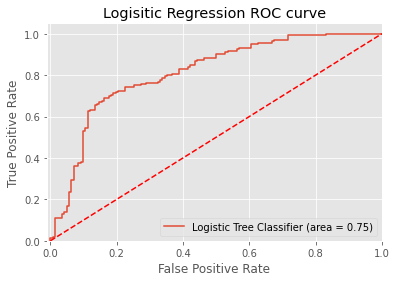

In [44]:
# Plotting the ROC curve
Logistic_roc_auc = roc_auc_score(y_test,ss)
fpr1, tpr1, thresholds = roc_curve(pp, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Tree Classifier (area = %0.2f)' % Logistic_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logisitic Regression ROC curve")
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [45]:
#Hyper parameter Tuning
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(1, 8, 8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8],
    "n_estimators":[50, 100, 120, 150]
    }
clf1 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model_z = clf1.fit(X_train,y_train)
print(best_model_z.best_estimator_)
print("The mean accuracy of the model is:",best_model_z.score(X_test,y_test))

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=0.1,
                           min_samples_split=1.0, random_state=42)
The mean accuracy of the model is: 0.7715231788079471


In [46]:
gb_cv.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
clf1.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'log_loss',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': 42,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(random_state=42),
 'n_jobs': -1,
 'param_grid': {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
  'min_samples_split': array([1., 2., 3., 4., 5., 6., 7., 8.]),
  'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
  'max_depth': [3, 5

In [48]:
# Best Parameters
gradientBoostingModel=GradientBoostingClassifier(learning_rate= 0.1,
 max_depth= 3,
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators =100)

gradientBoostingModel.fit(X_train,y_train)

print("The mean accuracy of the model is:",gradientBoostingModel.score(X_test,y_test))
y_pred = gradientBoostingModel.predict(X_test)

print('Accuracy of Gradient on test set: {:.2f}'.format(gradientBoostingModel.score(X_test, y_test)*100))
print('Accuracy of Gradient Booster classifier on train set: {:.2f}'.format(gradientBoostingModel.score(X_train, y_train)*100))

The mean accuracy of the model is: 0.8410596026490066
Accuracy of Gradient on test set: 84.11
Accuracy of Gradient Booster classifier on train set: 91.03


In [50]:
# Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

report_GB = classification_report(y_test,y_pred)

print(report_GB)

Confusion Matrix:
 [[116  26]
 [ 22 138]]
              precision    recall  f1-score   support

           N       0.84      0.82      0.83       142
           Y       0.84      0.86      0.85       160

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



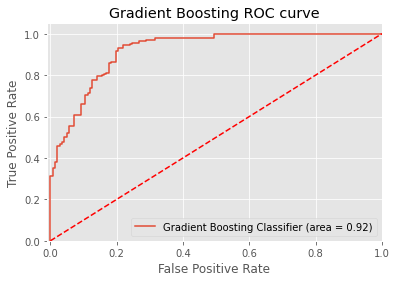

In [51]:
# Plotting the ROC curve
pp=pd.DataFrame(y_test)
pp.replace(('Y', 'N'), (1, 0), inplace=True)

y_pred_proba = gradientBoostingModel.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(pp,  y_pred_proba)
GB_roc_auc = metrics.roc_auc_score(pp, y_pred_proba)
plt.plot(fpr2,tpr2,label='Gradient Boosting Classifier (area = %0.2f)' % GB_roc_auc)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Gradient Boosting ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#KNN

In [52]:
#Hyper parameter Tuning
knn_cv=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
clf_knn= GridSearchCV(knn_cv, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=clf_knn.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [53]:
print(grid_search.best_params_)

{'n_neighbors': 1}


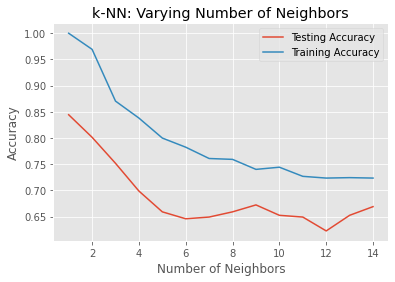

In [54]:
# Finding the number of neighbors
no_neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = [12,6]
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [55]:
df = pd.DataFrame()
df['Training_Accuracy'] = train_accuracy
df['Testing_Accuracy'] = test_accuracy
df

,Training_Accuracy,Testing_Accuracy
0,1.000000,0.844371
1,0.969269,0.801325
2,0.870432,0.751656
3,0.838040,0.698675
4,0.799834,0.658940
5,0.782392,0.645695
6,0.760797,0.649007
7,0.759136,0.658940
8,0.740033,0.672185
9,0.744186,0.652318


In [56]:
#Best Model
knn_cv_model=KNeighborsClassifier(n_neighbors=2)
knn_cv_model.fit(X_train,y_train)

print("The mean accuracy of the model is:",knn_cv_model.score(X_test,y_test))
y_pred = knn_cv_model.predict(X_test)

print('Accuracy of KNN on test set: {:.2f}'.format(knn_cv_model.score(X_test, y_test)))

The mean accuracy of the model is: 0.8013245033112583
Accuracy of KNN on test set: 0.80


In [57]:
print('Accuracy of KNN on train set: {:.2f}'.format(knn_cv_model.score(X_train, y_train)*100))

Accuracy of KNN on train set: 96.93


In [58]:
# Classification Report

confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)

report_KNN = classification_report(y_test,y_pred)

print(report_KNN)

Confusion Matrix:
 [[109  33]
 [ 27 133]]
              precision    recall  f1-score   support

           N       0.80      0.77      0.78       142
           Y       0.80      0.83      0.82       160

    accuracy                           0.80       302
   macro avg       0.80      0.80      0.80       302
weighted avg       0.80      0.80      0.80       302



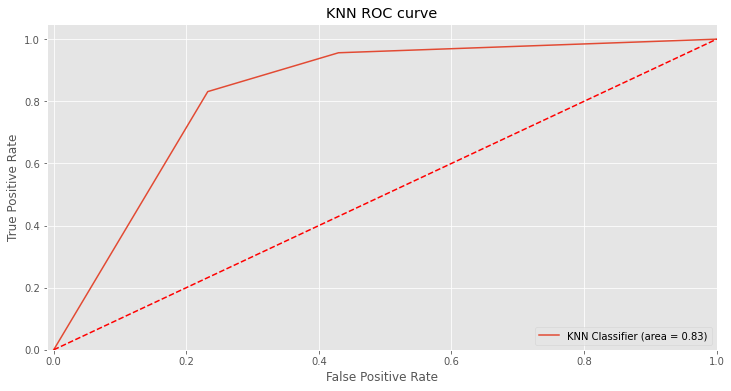

In [59]:
# Plotting the ROC curve
y_pred_proba = knn_cv_model.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(pp,  y_pred_proba)
KNN_auc = metrics.roc_auc_score(pp, y_pred_proba)

plt.legend(loc=4)
plt.rcParams["figure.figsize"] = [8,4]
plt.plot(fpr3, tpr3, label='KNN Classifier (area = %0.2f)' % KNN_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("KNN ROC curve")
plt.legend(loc="lower right")
plt.show()

#Random Forest

In [60]:
#Hyper parameter Tuning
#Grid Search for RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}


clf_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,cv=3, verbose=0,n_jobs=-1)
best_model_rf = clf_rf.fit(X_train,y_train)
print(best_model_rf.best_estimator_)
print("The mean accuracy of the model is:",best_model_rf.score(X_test,y_test))

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=42)
The mean accuracy of the model is: 0.8642384105960265


In [61]:
#Best Model
rf_model = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300, random_state=42)
rf_model.fit(X_train,y_train)

print("The mean accuracy of the model is:",rf_model.score(X_test,y_test))
y_pred = rf_model.predict(X_test)

print('Accuracy of Gradient on test set: {:.2f}'.format(rf_model.score(X_test, y_test)*100))

print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rf_model.score(X_train, y_train)*100))

The mean accuracy of the model is: 0.890728476821192
Accuracy of Gradient on test set: 89.07
Accuracy of Random Forest classifier on train set: 98.26


In [63]:
# Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

report_rf = classification_report(y_test, y_pred)

print(report_rf)

Confusion Matrix:
 [[126  16]
 [ 17 143]]
              precision    recall  f1-score   support

           N       0.88      0.89      0.88       142
           Y       0.90      0.89      0.90       160

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



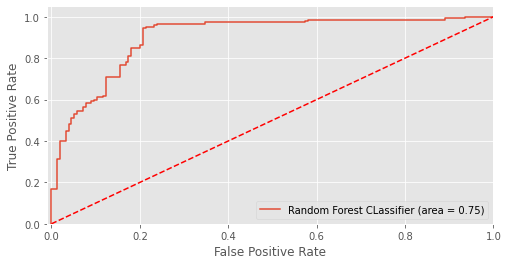

In [64]:
# Plotting the ROC curve
RF_roc_auc = roc_auc_score(y_test,ss)
fpr4, tpr4, thresholds = roc_curve(ss, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr4, tpr4, label='Random Forest CLassifier (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#Decision Tree

In [65]:
#Hyper parameter Tuning
param_grid = {

    'max_depth': range(25, 45),

    'max_features': range(2, 11)}

clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,cv=3, verbose=0,n_jobs=-1)

best_model_dt = clf_dt.fit(X_train,y_train)

print(best_model_dt.best_estimator_)

print("The mean accuracy of the model is:",best_model_dt.score(X_test,y_test))

DecisionTreeClassifier(max_depth=25, max_features=8, random_state=42)
The mean accuracy of the model is: 0.8708609271523179


In [66]:
#Best Model
dt_cv=DecisionTreeClassifier(max_depth=25, max_features=8, random_state=42)
dt_cv.fit(X_train,y_train)

print("The mean accuracy of the model is:",dt_cv.score(X_test,y_test))
y_pred = dt_cv.predict(X_test)

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dt_cv.score(X_test, y_test)))

print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(dt_cv.score(X_train, y_train)*100))

The mean accuracy of the model is: 0.8708609271523179
Accuracy of Decision Tree Classifier on test set: 0.87
Accuracy of Decision Tree classifier on train set: 100.00


In [68]:
# Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

report_decision_tree = classification_report(y_test, y_pred)

print(report_decision_tree)

Confusion Matrix:
 [[111  31]
 [  8 152]]
              precision    recall  f1-score   support

           N       0.93      0.78      0.85       142
           Y       0.83      0.95      0.89       160

    accuracy                           0.87       302
   macro avg       0.88      0.87      0.87       302
weighted avg       0.88      0.87      0.87       302



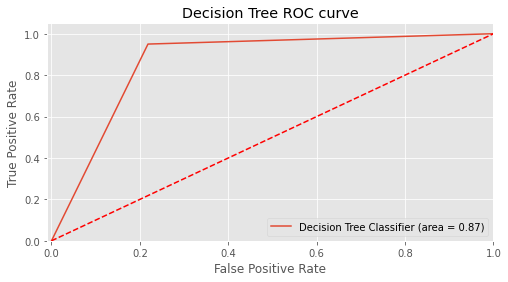

In [69]:
#Plotting the ROC curve
fpr5, tpr5, thresholds = roc_curve(pp, dt_cv.predict_proba(X_test)[:,1])
Decision_roc_auc = roc_auc_score(y_test,dt_cv.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr5, tpr5, label='Decision Tree Classifier (area = %0.2f)' % Decision_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC curve")
plt.legend(loc="lower right")
plt.show()

#Support Vector Machine

In [70]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, k

In [74]:
# Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix: \n",confusion_matrix(y_test,grid_predictions))

print(classification_report(y_test,grid_predictions))

Confusion Matrix: 
 [[142   0]
 [ 16 144]]
              precision    recall  f1-score   support

           N       0.90      1.00      0.95       142
           Y       1.00      0.90      0.95       160

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



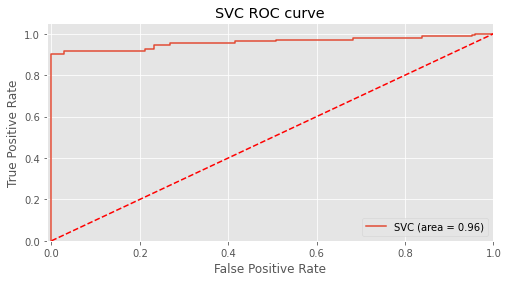

In [75]:
# Plotting the ROC curve
fpr6, tpr6, thresholds = roc_curve(pp, grid.predict_proba(X_test)[:,1])
SVC_roc_auc = roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr6, tpr6, label='SVC (area = %0.2f)' % SVC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("SVC ROC curve")
plt.legend(loc="lower right")
plt.show()

#Performance Evaluation

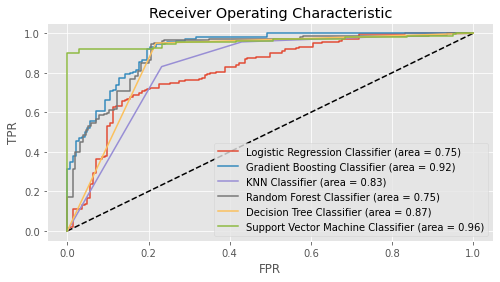

In [76]:
#Plotting all the ROC curves together in order to compare the models.
plt.plot([0,1],[0,1], 'k--')
plt.rcParams["figure.figsize"] = [12,6]
plt.plot(fpr1, tpr1, label='Logistic Regression Classifier (area = %0.2f)' % Logistic_roc_auc)
plt.plot(fpr2, tpr2, label='Gradient Boosting Classifier (area = %0.2f)' % GB_roc_auc)
plt.plot(fpr3, tpr3, label='KNN Classifier (area = %0.2f)' % KNN_auc)
plt.plot(fpr4, tpr4, label='Random Forest Classifier (area = %0.2f)' % RF_roc_auc)
plt.plot(fpr5, tpr5, label='Decision Tree Classifier (area = %0.2f)' % Decision_roc_auc)
plt.plot(fpr6, tpr6, label='Support Vector Machine Classifier (area = %0.2f)' % SVC_roc_auc)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [77]:
#Making a dataframe to compare model accuracy values.
models = pd.DataFrame({
    'Model' : ['Logistic Regression','GradientBoosting','KNN', 'RandomForestClassifier','Decision Tree','Support Vector Machine'],
    'Score' : [logreg.score(X_test, y_test),gradientBoostingModel.score(X_test, y_test),knn_cv_model.score(X_test, y_test),
               rf_model.score(X_test, y_test), dt_cv.score(X_test, y_test), grid.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Support Vector Machine,0.947020
3,RandomForestClassifier,0.890728
4,Decision Tree,0.870861
1,GradientBoosting,0.841060
2,KNN,0.801325
0,Logistic Regression,0.751656


In [78]:
#Plotting model accuracy.
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score',
       title = 'Models Comparison')

Both accuracy and ROC AUC scores show us that Support Vector Machine works the best here.